In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import statistics as st
from datetime import datetime

In [27]:
model_path = "/home/aevans/transformer_ml/src/data/temp_df/20240327/Mohawk Valley/ml_output.parquet"

clim_div = 'Mohawk Valley'

In [28]:
nysm_cats_path = "/home/aevans/nwp_bias/src/landtype/data/nysm.csv"
nysm_cats_df = pd.read_csv(nysm_cats_path)
stations = nysm_cats_df[nysm_cats_df['climate_division_name']==clim_div]['stid'].unique()
stations

array(['CAMD', 'HERK', 'JOHN', 'OPPE', 'SPRA', 'WEST'], dtype=object)

In [29]:
df = pd.read_parquet(model_path)
df = df.sort_index()

In [30]:
df

,0_transformer_output,0_target,1_transformer_output,1_target,2_transformer_output,2_target,3_transformer_output,3_target,4_transformer_output,4_target,5_transformer_output,5_target
0,2.029256,-0.868662,2.931209,-1.349549,2.473431,-0.672294,3.312813,-0.915195,2.282330,-1.334138,2.659688,-2.300341
0,-0.670346,-0.982773,-0.200112,-0.378104,-0.944790,-0.060518,-0.078637,0.555571,-0.462472,0.285759,-0.275294,-0.390708
1,-0.266295,-0.698507,0.021909,-0.323078,-0.310798,-0.314102,0.593507,0.405827,-0.124027,0.031842,0.262543,-0.105358
1,1.461782,-0.819781,-0.212576,-1.328929,-0.246782,-1.344732,0.342281,-0.728904,-1.131769,-1.477041,-0.067023,-2.106549
2,-1.412571,-0.637813,-1.437910,-0.787557,-2.391651,-0.945442,-1.407302,-0.197460,-1.272269,-1.614601,-1.025409,-2.179253
...,...,...,...,...,...,...,...,...,...,...,...,...
31476,0.909347,-0.620158,0.989563,-0.698629,-0.112867,-0.780441,0.027476,-1.601128,0.227204,-1.086894,0.392780,-0.986934
31477,-1.482464,-0.757155,-0.138505,-0.725407,-0.566143,-0.535108,-0.200364,-1.439645,-0.355149,-1.272134,-1.793047,-0.966443
31478,-0.184338,-1.333807,-1.007968,-0.642387,-2.064797,-0.688299,-0.686071,-2.014067,-1.351728,-1.504204,-0.665982,-1.268407
31479,0.392649,-1.399274,-0.419232,-1.118762,-0.510730,-1.115722,-0.822804,-1.854359,-0.992470,-0.892130,0.200608,-1.246849


In [31]:
def which_fold(df, fold):
    length = len(df)
    test_len = int(length * 0.2)
    df_train = pd.DataFrame()

    for n in np.arange(0, 5):
        if n != fold:
            df1 = df.iloc[int(0.2 * n * length) : int(0.2 * (n + 1) * length)]
            df_train = pd.concat([df_train, df1])
        else:
            df_test = df.iloc[int(0.2 * n * length) : int(0.2 * (n + 1) * length)]

    return df_train['valid_time'], df_test['valid_time']

In [32]:
# df_train, df_test = which_fold(df, 4)

In [33]:
# df_test.iloc[0]

In [34]:
# df_test.iloc[-1]

In [35]:
# df = df[df['valid_time'] > datetime(2022, 12, 1, 0, 0, 0)]
# df = df[df['valid_time'] < datetime(2023, 12, 30, 23, 0, 0)]

In [36]:
# mean = st.mean(abs(df['diff']))
# mean

In [37]:
df.shape

(39340, 12)

In [48]:
df = df.iloc[int(len(df)*0.9):]

In [53]:
def plot_outputs(df_out, clim_div, stations):
    import matplotlib.pyplot as plt 
    df_out = df_out.sort_index()
    fig, axs = plt.subplots(int(df_out.shape[1]/2), figsize=(21, 21), sharex=True, sharey=True)
    n = int(df_out.shape[1]/2)
    i = 0
    while n>i:
        axs[i].set_ylabel(f'{stations[i]}')
        axs[i].plot(df_out[f'{i}_target'], c="r", label="Target")
        axs[i].plot(df_out[f"{i}_transformer_output"], c="b", alpha=0.7, label="Transformer Output")
        
        print(f"Mean Absolute Difference of {stations[i]}: {abs(df_out[f'{i}_target'] - df_out[f'{i}_transformer_output']).mean()}")
        i+=1
    fig.suptitle(f"Transformer Output v Target", fontsize=28)
    # axs[-1].set_xticklabels([2018, 2019, 2020, 2021, 2022, 2023], fontsize=18)
    # axs[-1].set_xticks(np.arange(0, len(df_out["0_target"]), (len(df_out["0_target"])) / 6))
    axs[0].legend()
    plt.tight_layout()

Mean Absolute Difference of CAMD: 1.085448801398467
Mean Absolute Difference of HERK: 1.1022374502495706
Mean Absolute Difference of JOHN: 1.0124598455839968
Mean Absolute Difference of OPPE: 1.134645331230515
Mean Absolute Difference of SPRA: 1.040770966309746
Mean Absolute Difference of WEST: 1.0383729091944232


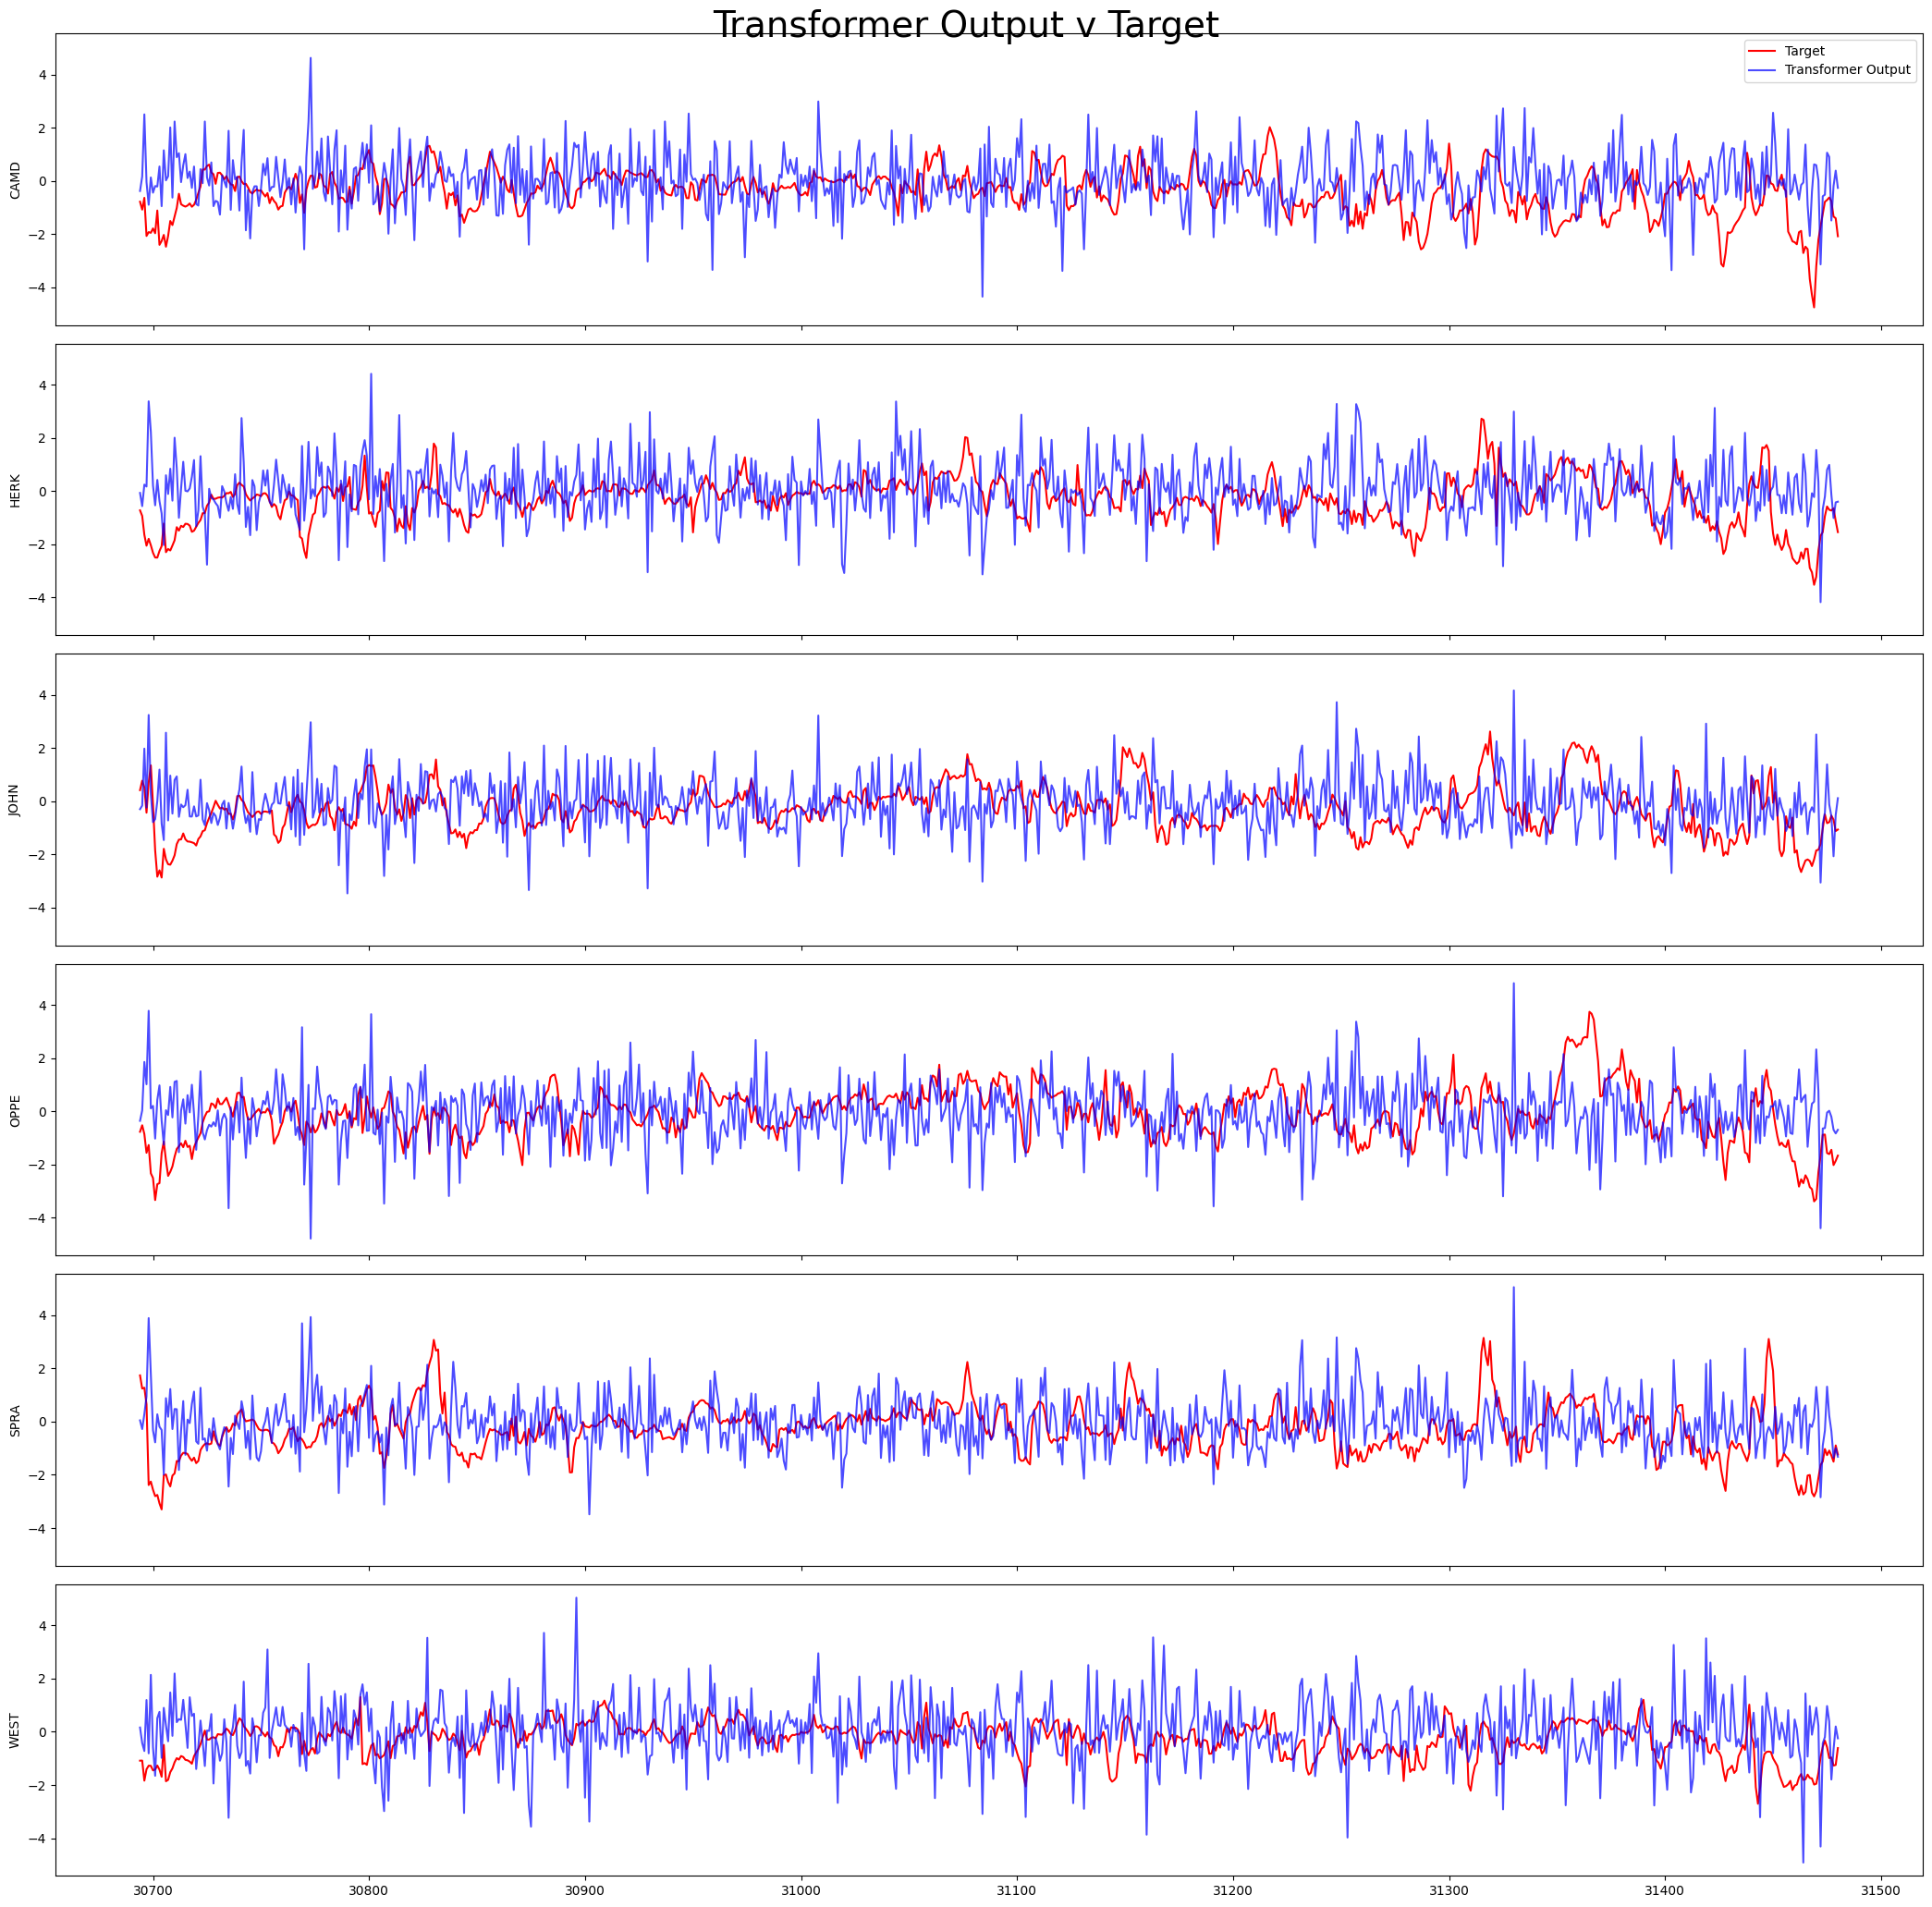

In [54]:
plot_outputs(df, clim_div, stations)